In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
# Custom color gradient based on provided palette
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap", ['#e4d9eb', '#f8ddd3', '#e58065', '#df553f']
)

In [84]:

### all genes

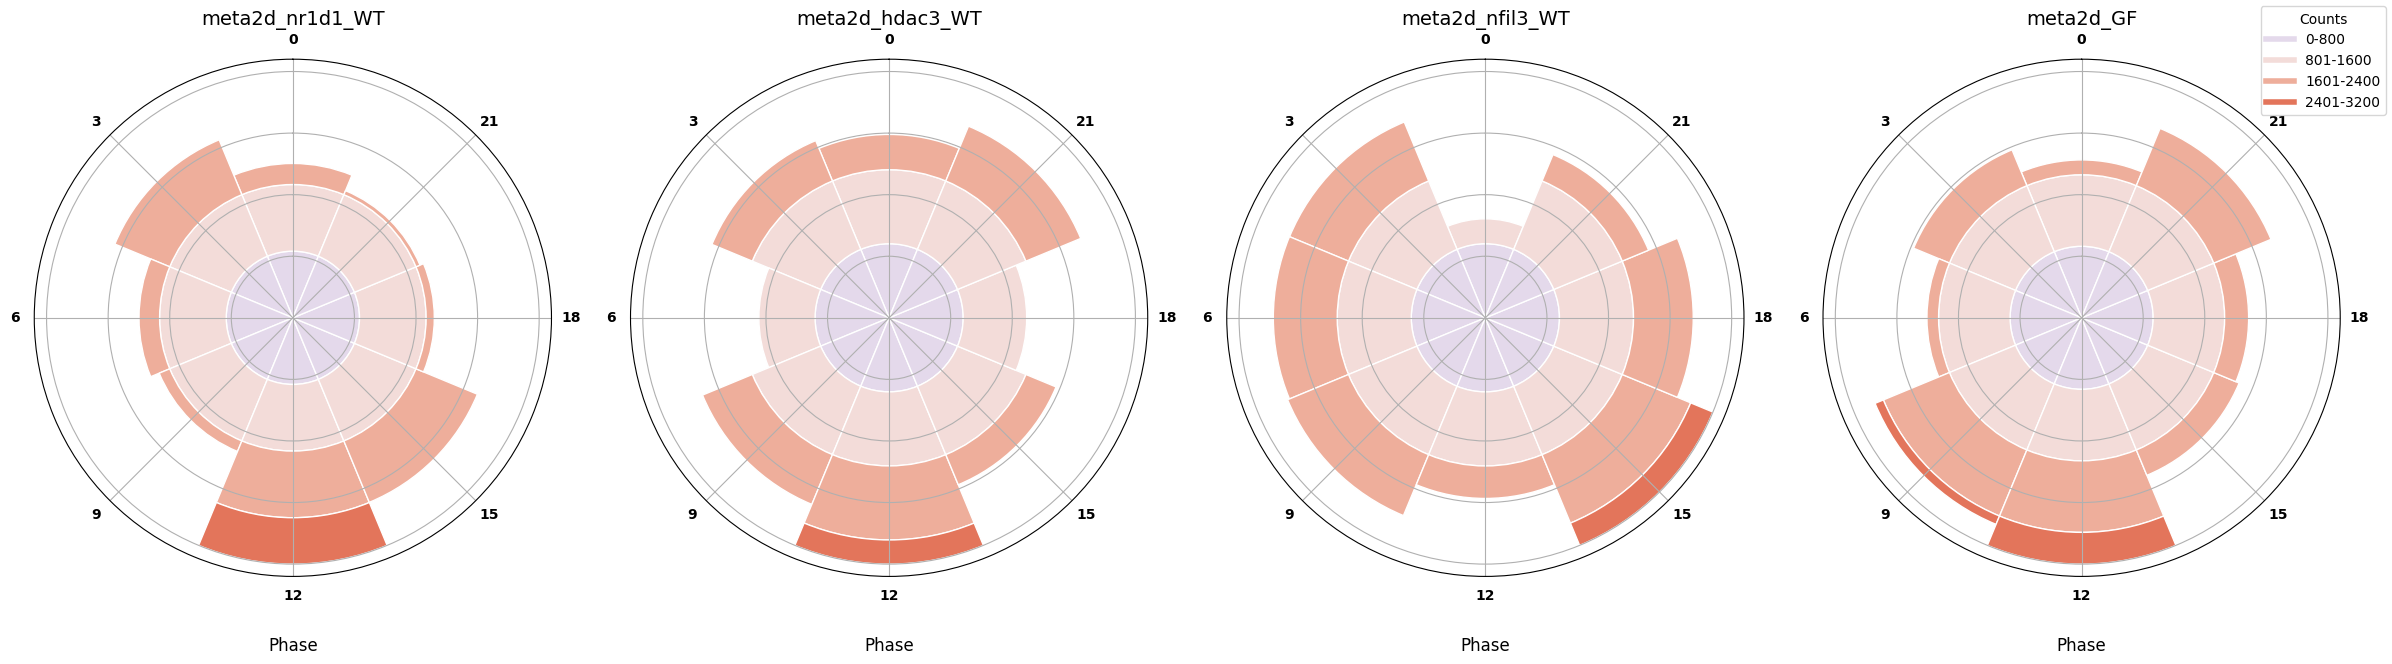

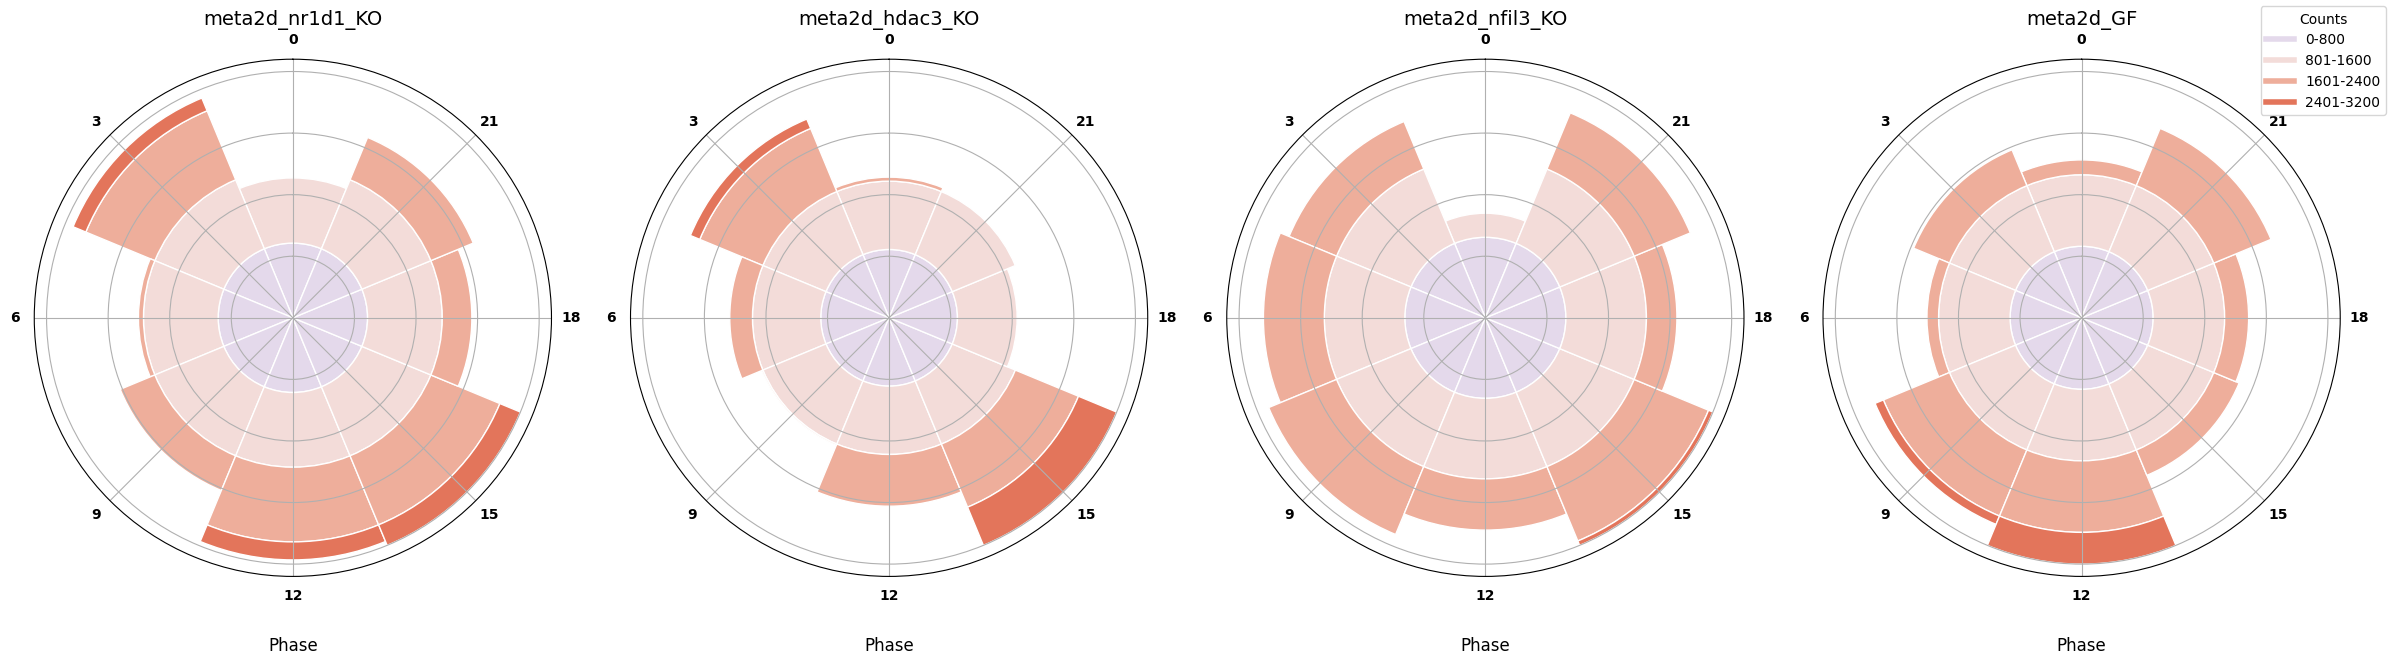

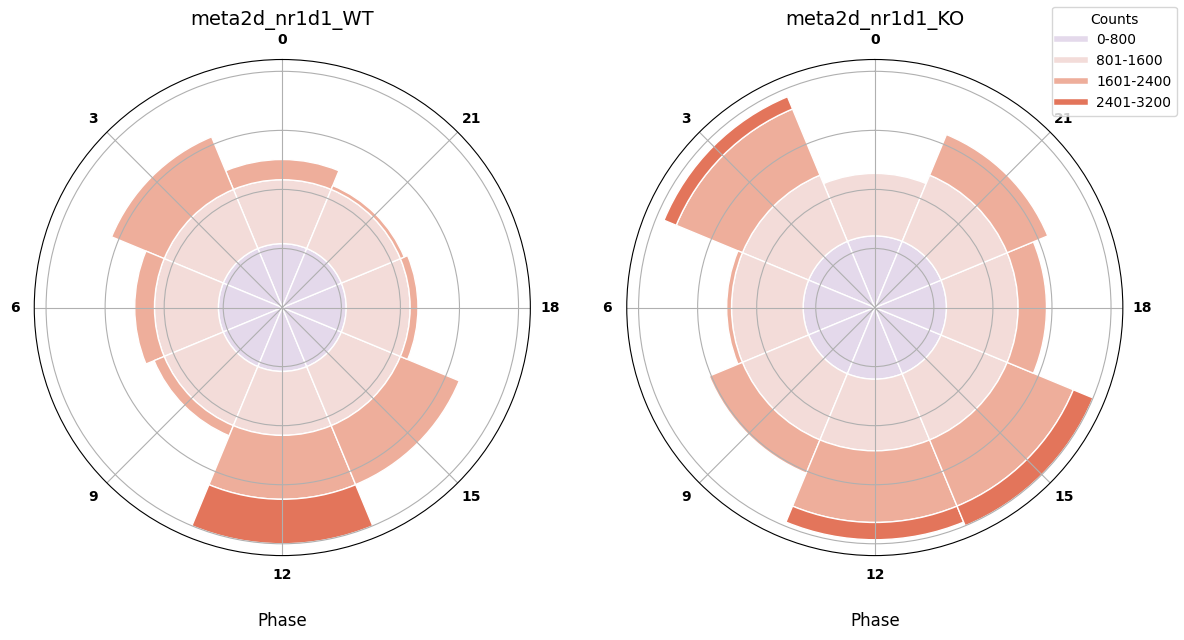

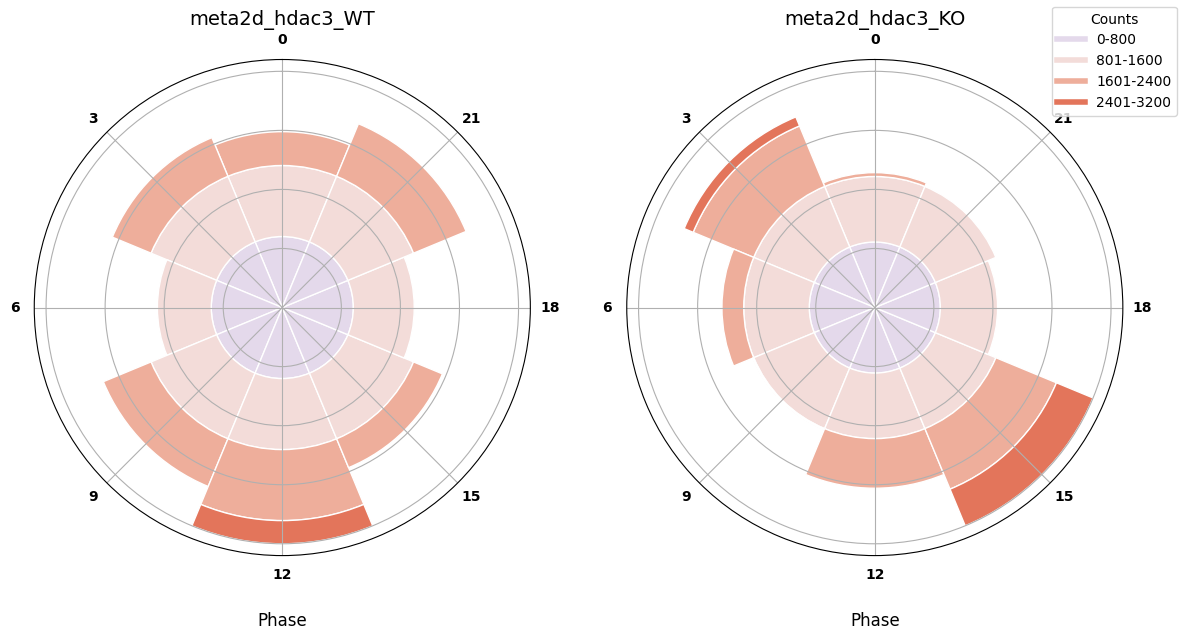

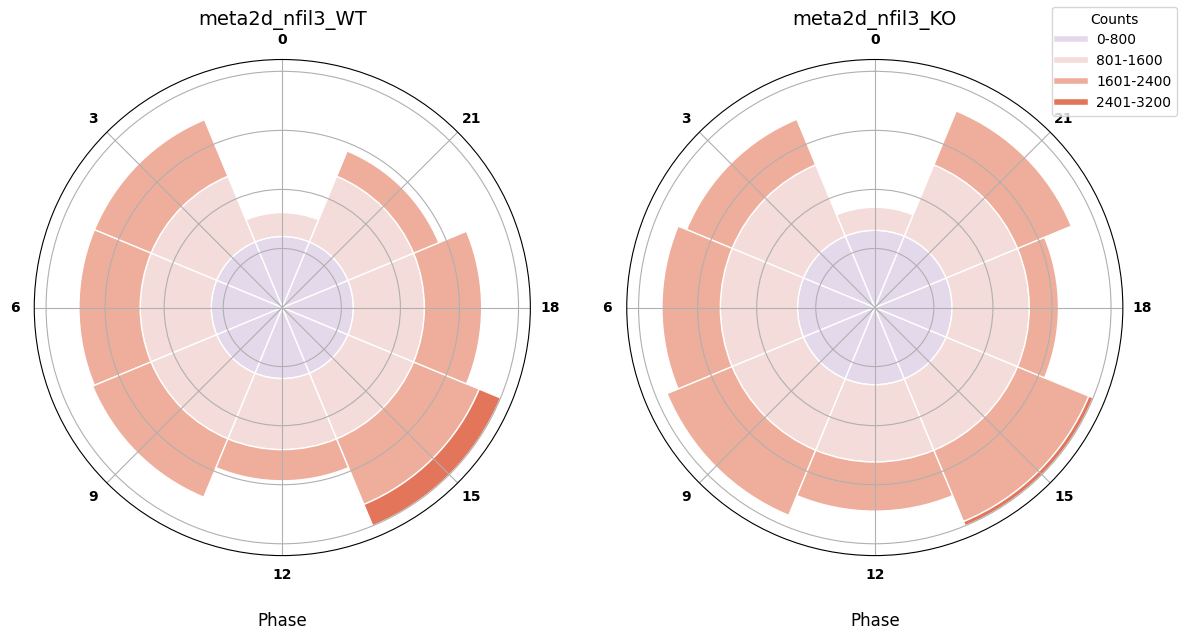

In [87]:
# Define the function to process files and draw the polar plots
def plot_grouped_phases(file_list, cmap):
    num_files = len(file_list)
    fig, axs = plt.subplots(1, num_files, figsize=(6 * num_files, 6), subplot_kw={'projection': 'polar'})

    # If there's only one subplot, axs isn't iterable, so we make it a list
    if num_files == 1:
        axs = [axs]

    for ax, file_name in zip(axs, file_list):
        # Load the data
        df = pd.read_csv(file_name, sep='\t')

        # Process the phase column, rounding to nearest multiple of 3
        df['Rounded_Phase'] = (df['meta2d_phase'] / 3).round() * 3
        phase_counts = df['Rounded_Phase'].value_counts().sort_index()

        # Define the sectors and their corresponding angles
        sectors = np.linspace(0, 2 * np.pi, 8, endpoint=False)
        widths = np.pi / 4 * np.ones_like(sectors)
        ax.set_theta_offset(np.pi / 2)
        # Define count ranges and their corresponding colors
        ranges = [0, 800, 1600, 2400, 3200]
        colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]

        # Plot the bars with color gradient according to specified ranges
        for sector, (lag, count) in zip(sectors, phase_counts.items()):
            bottom = 0
            for i in range(len(ranges) - 1):
                if count > ranges[i]:
                    top = min(count, ranges[i + 1])
                    ax.bar(sector, top - bottom, width=widths[0], bottom=bottom,
                           color=colors[i], edgecolor='white')
                    bottom = top

        # Set the phase labels
        ax.set_xticks(sectors)
        ax.set_xticklabels(range(0, 24, 3), fontsize=10, fontweight='bold')

        # Set the grid and other aesthetics
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)

        # Set the circle grid to be more even
        max_count = phase_counts.max()
        radii_interval = max_count / 4
        radii_ticks = np.arange(0, max_count + radii_interval, radii_interval)
        ax.set_yticks(radii_ticks)
        ax.set_yticklabels([])

        # Remove existing count labels and other annotations
        for text in ax.texts:
            text.set_visible(False)

        # Labeling the axes for phase and count
        ax.text(0.5, -0.15, "Phase", transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', horizontalalignment='center')

        # Add a title for each subplot with the filename (without the extension)
        title = file_name.split('/')[-1].split('.')[0]
        ax.set_title(title, fontsize=14)

    # Create a single legend for all plots
    legend_labels = ["0-800", "801-1600", "1601-2400", "2401-3200"]
    legend_colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75)]
    patches = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
    fig.legend(patches, legend_labels, loc='upper right', fontsize=10, title="Counts")

    plt.tight_layout()
    plt.show()

file_list_WT = [ 'meta2d_nr1d1_WT.txt', 'meta2d_hdac3_WT.txt' ,'meta2d_nfil3_WT.txt' ,'meta2d_GF.txt']
file_list_KO = [ 'meta2d_nr1d1_KO.txt', 'meta2d_hdac3_KO.txt' ,'meta2d_nfil3_KO.txt' ,'meta2d_GF.txt']
file_nr1d1 = ["meta2d_nr1d1_WT.txt","meta2d_nr1d1_KO.txt"]
file_hdac3 = ["meta2d_hdac3_WT.txt","meta2d_hdac3_KO.txt"]
file_nfil3 = ["meta2d_nfil3_WT.txt","meta2d_nfil3_KO.txt"]
# Plot the grouped phases
plot_grouped_phases(file_list_WT, custom_cmap)
plot_grouped_phases(file_list_KO, custom_cmap)
plot_grouped_phases(file_nr1d1, custom_cmap)
plot_grouped_phases(file_hdac3, custom_cmap)
plot_grouped_phases(file_nfil3, custom_cmap)

In [ ]:
#### WT only

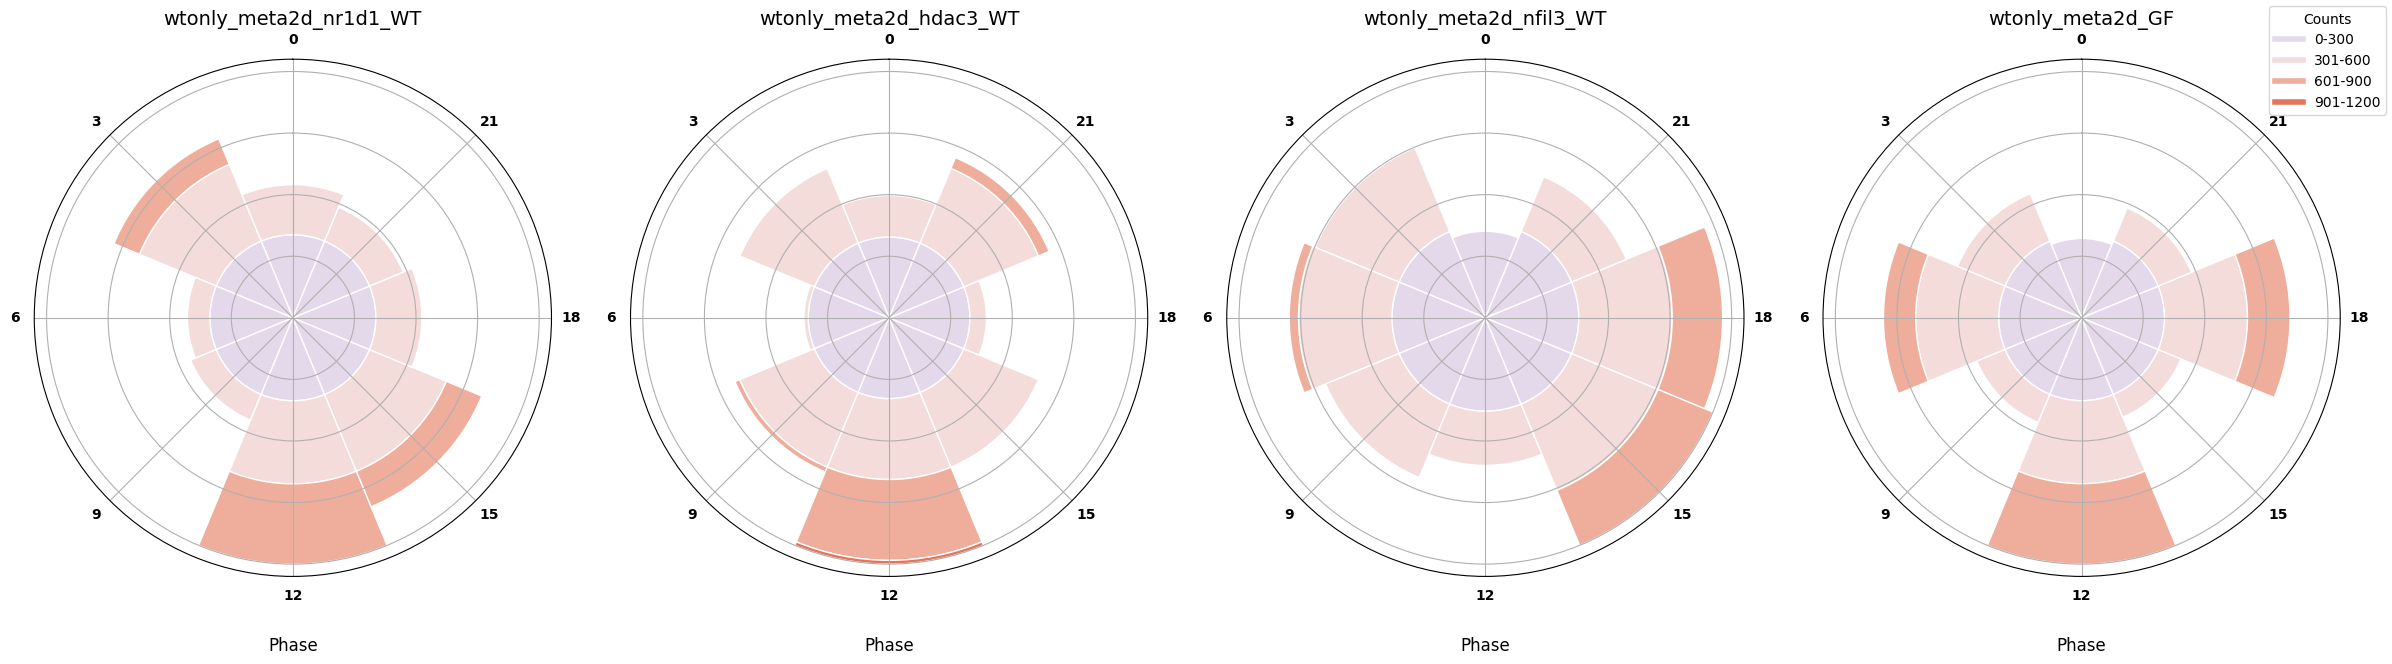

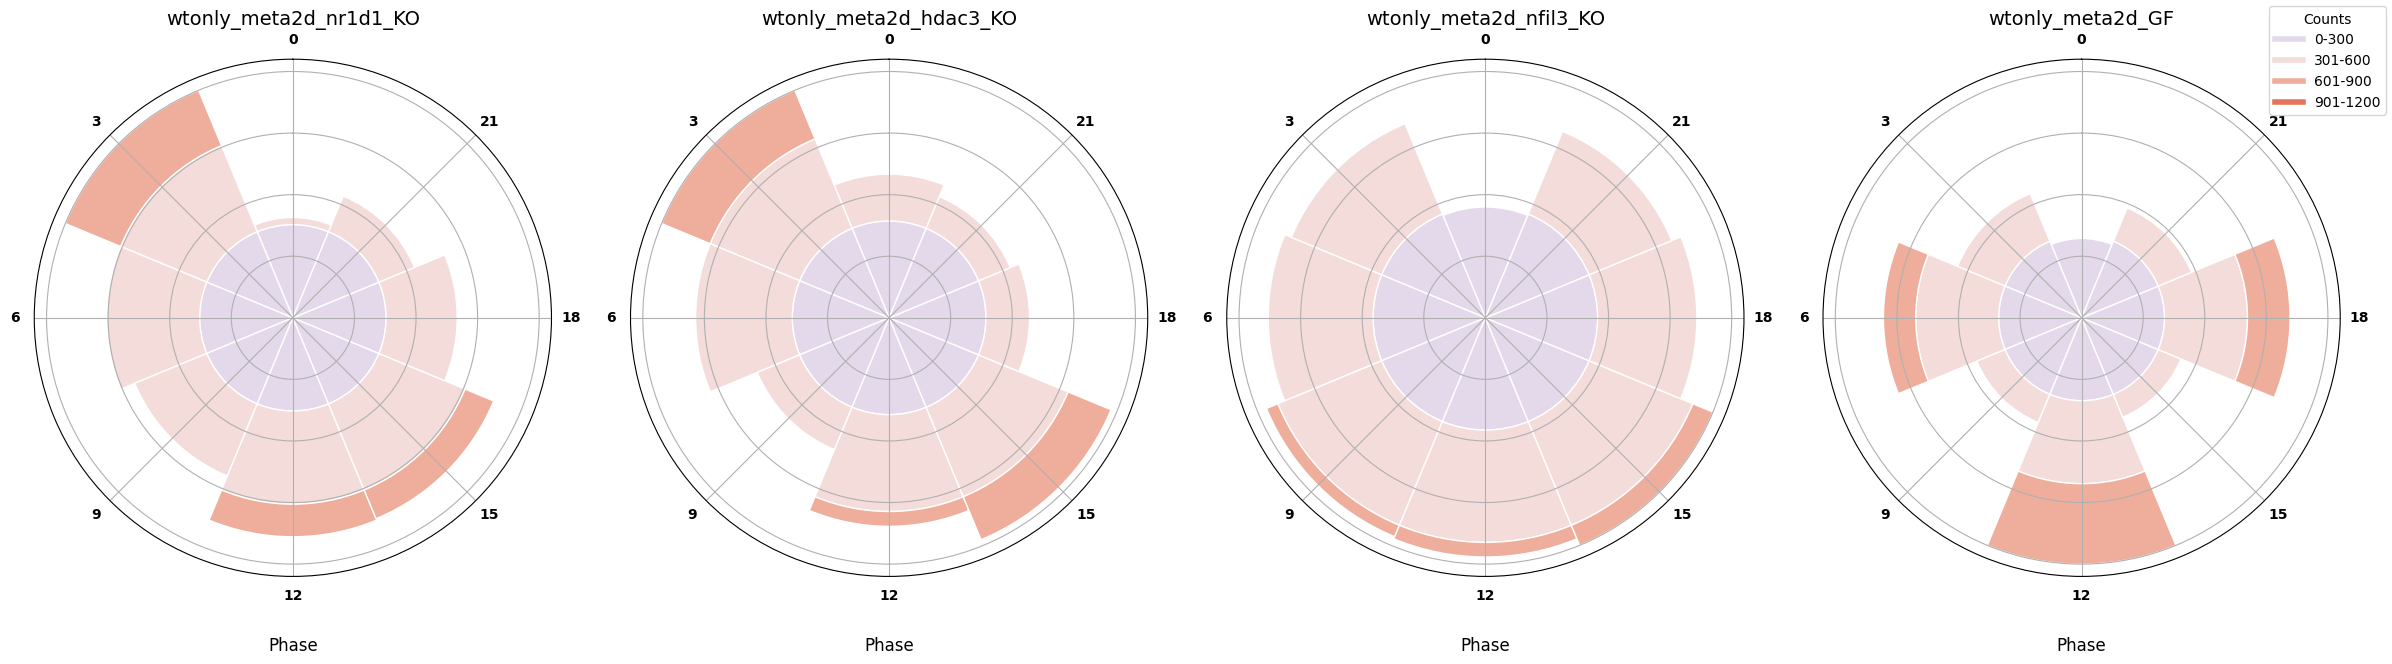

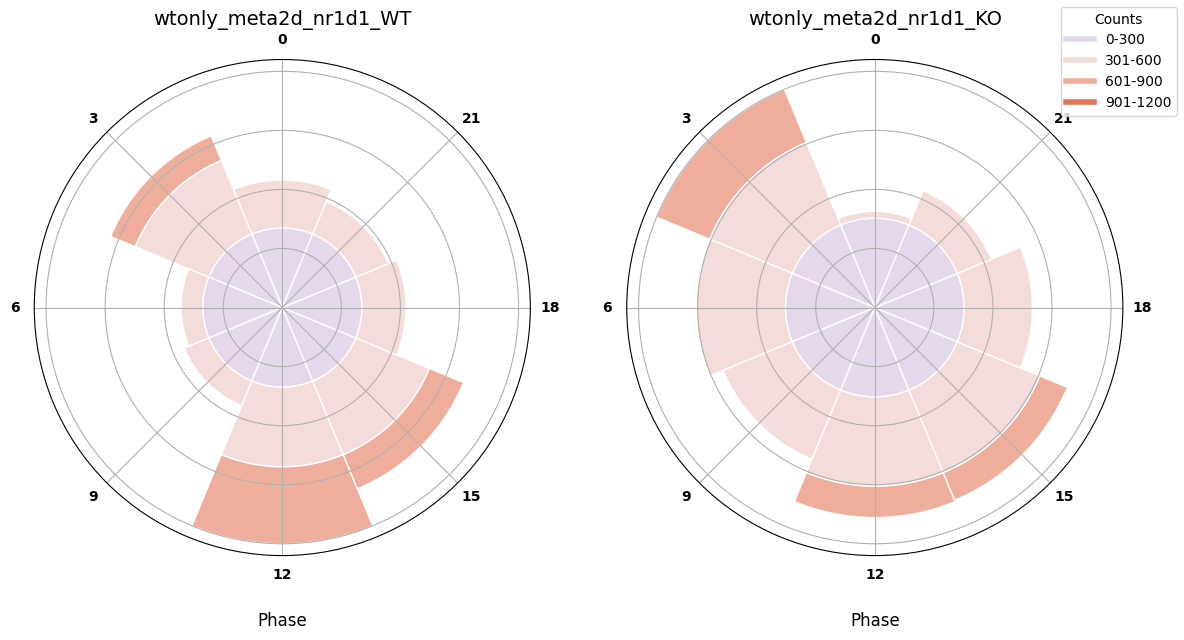

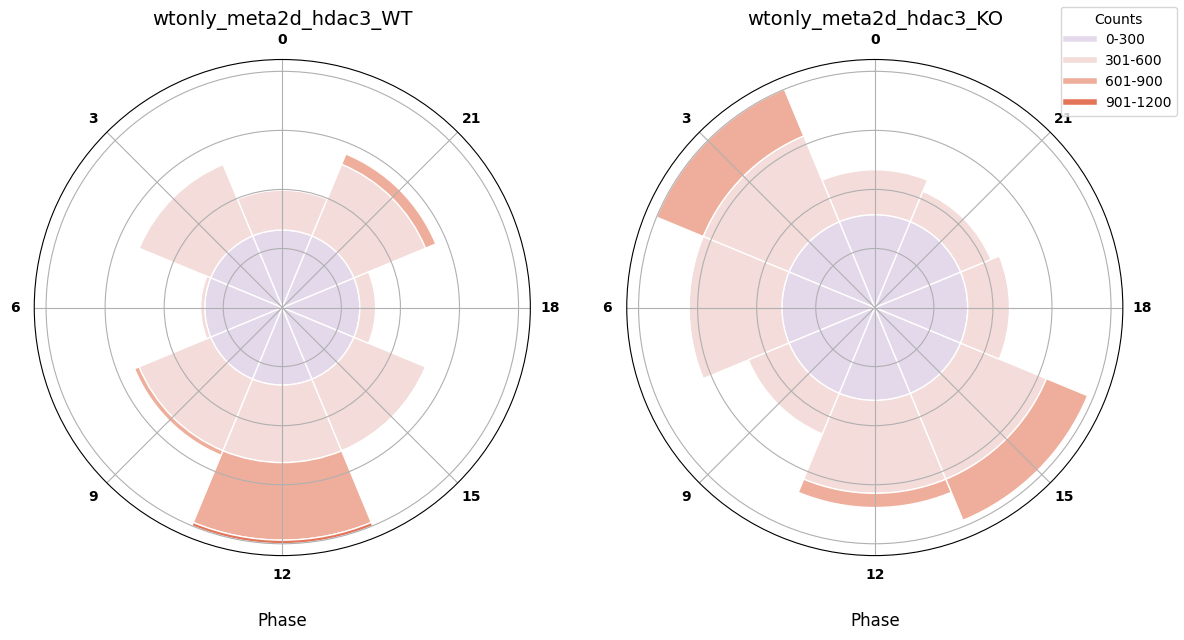

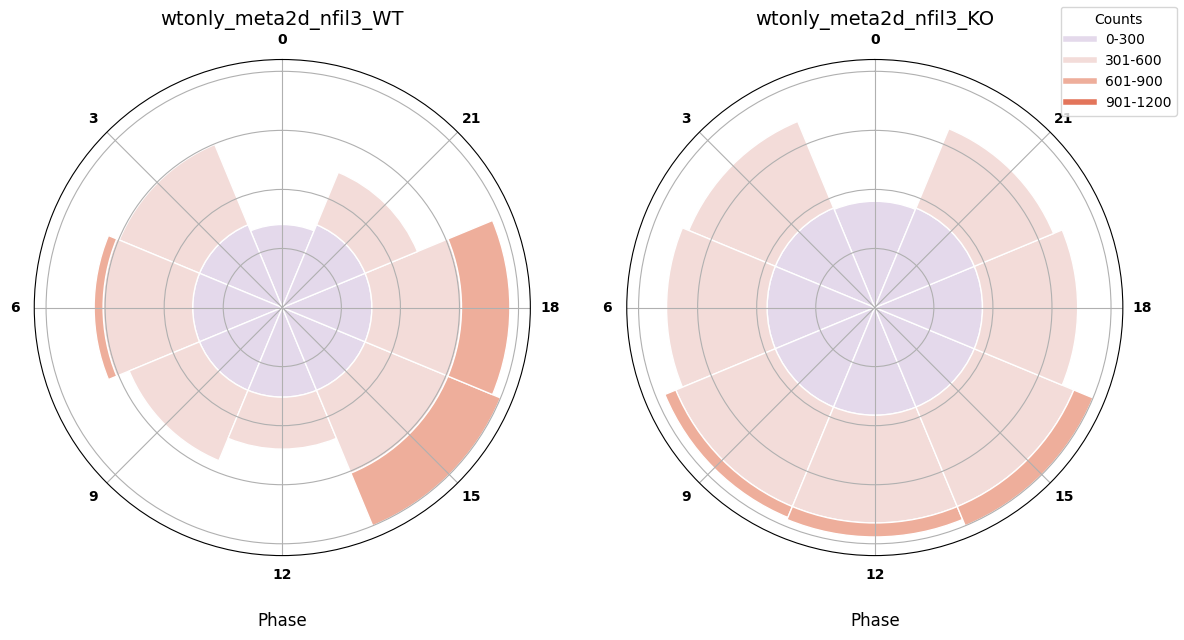

In [88]:
# Define the function to process files and draw the polar plots
def plot_grouped_phases(file_list, cmap):
    num_files = len(file_list)
    fig, axs = plt.subplots(1, num_files, figsize=(6 * num_files, 6), subplot_kw={'projection': 'polar'})

    # If there's only one subplot, axs isn't iterable, so we make it a list
    if num_files == 1:
        axs = [axs]

    for ax, file_name in zip(axs, file_list):
        # Load the data
        df = pd.read_csv(file_name, sep='\t')

        # Process the phase column, rounding to nearest multiple of 3
        df['Rounded_Phase'] = (df['meta2d_phase'] / 3).round() * 3
        phase_counts = df['Rounded_Phase'].value_counts().sort_index()

        # Define the sectors and their corresponding angles
        sectors = np.linspace(0, 2 * np.pi, 8, endpoint=False)
        widths = np.pi / 4 * np.ones_like(sectors)
        ax.set_theta_offset(np.pi / 2)
        # Define count ranges and their corresponding colors
        ranges = [0, 300, 600, 900, 1200]
        colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]

        # Plot the bars with color gradient according to specified ranges
        for sector, (lag, count) in zip(sectors, phase_counts.items()):
            bottom = 0
            for i in range(len(ranges) - 1):
                if count > ranges[i]:
                    top = min(count, ranges[i + 1])
                    ax.bar(sector, top - bottom, width=widths[0], bottom=bottom,
                           color=colors[i], edgecolor='white')
                    bottom = top

        # Set the phase labels
        ax.set_xticks(sectors)
        ax.set_xticklabels(range(0, 24, 3), fontsize=10, fontweight='bold')

        # Set the grid and other aesthetics
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)

        # Set the circle grid to be more even
        max_count = phase_counts.max()
        radii_interval = max_count / 4
        radii_ticks = np.arange(0, max_count + radii_interval, radii_interval)
        ax.set_yticks(radii_ticks)
        ax.set_yticklabels([])

        # Remove existing count labels and other annotations
        for text in ax.texts:
            text.set_visible(False)

        # Labeling the axes for phase and count
        ax.text(0.5, -0.15, "Phase", transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', horizontalalignment='center')

        # Add a title for each subplot with the filename (without the extension)
        title = file_name.split('/')[-1].split('.')[0]
        ax.set_title(title, fontsize=14)

    # Create a single legend for all plots
    legend_labels = ["0-300", "301-600", "601-900", "901-1200"]
    legend_colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75)]
    patches = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
    fig.legend(patches, legend_labels, loc='upper right', fontsize=10, title="Counts")

    plt.tight_layout()
    plt.show()

file_list_WT = [ 'wtonly_meta2d_nr1d1_WT.txt', 'wtonly_meta2d_hdac3_WT.txt' ,'wtonly_meta2d_nfil3_WT.txt' ,'wtonly_meta2d_GF.txt']
file_list_KO = [ 'wtonly_meta2d_nr1d1_KO.txt', 'wtonly_meta2d_hdac3_KO.txt' ,'wtonly_meta2d_nfil3_KO.txt' ,'wtonly_meta2d_GF.txt']
file_nr1d1 = ["wtonly_meta2d_nr1d1_WT.txt","wtonly_meta2d_nr1d1_KO.txt"]
file_hdac3 = ["wtonly_meta2d_hdac3_WT.txt","wtonly_meta2d_hdac3_KO.txt"]
file_nfil3 = ["wtonly_meta2d_nfil3_WT.txt","wtonly_meta2d_nfil3_KO.txt"]
# Plot the grouped phases
plot_grouped_phases(file_list_WT, custom_cmap)
plot_grouped_phases(file_list_KO, custom_cmap)
plot_grouped_phases(file_nr1d1, custom_cmap)
plot_grouped_phases(file_hdac3, custom_cmap)
plot_grouped_phases(file_nfil3, custom_cmap)

In [ ]:
## GF only

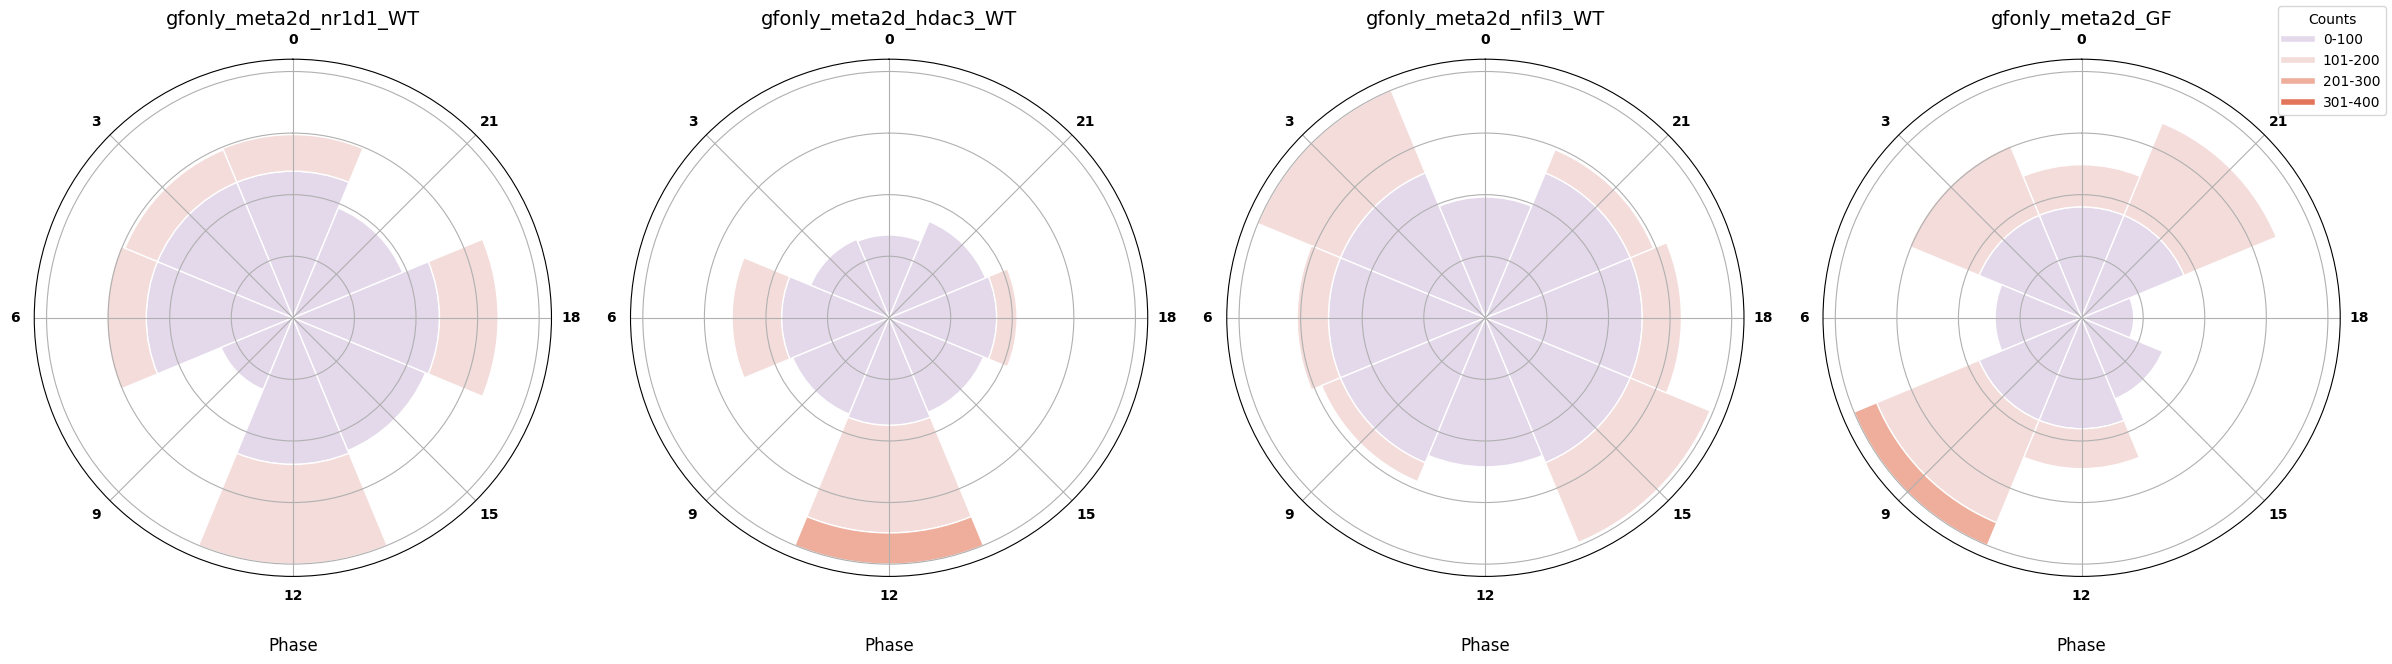

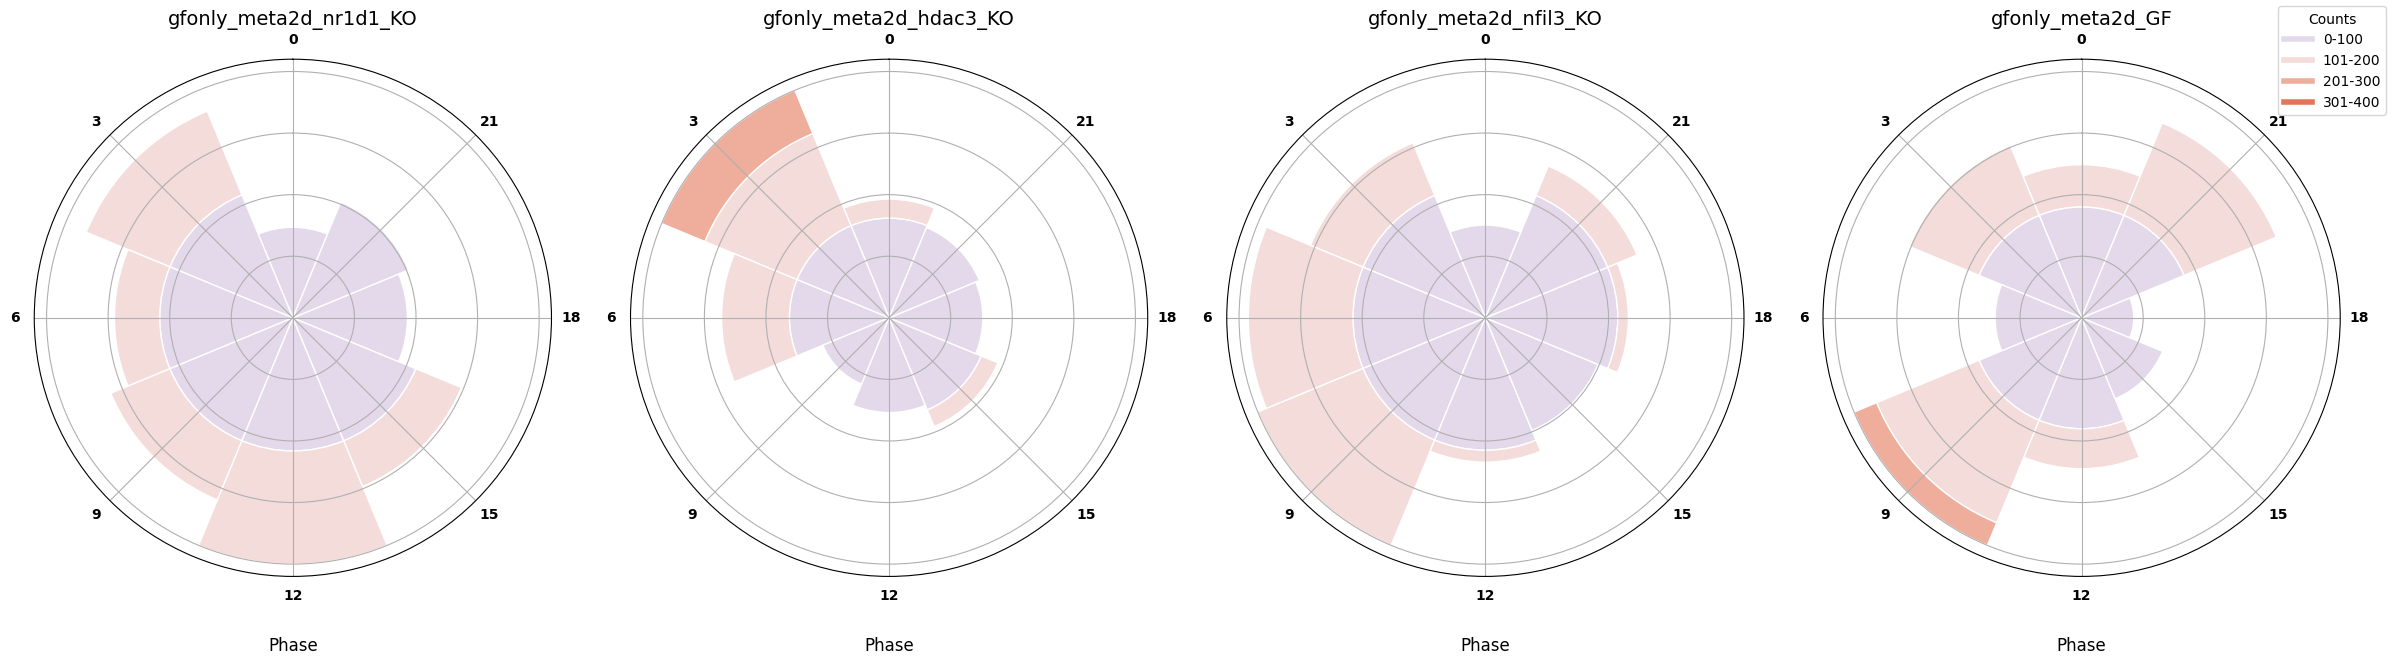

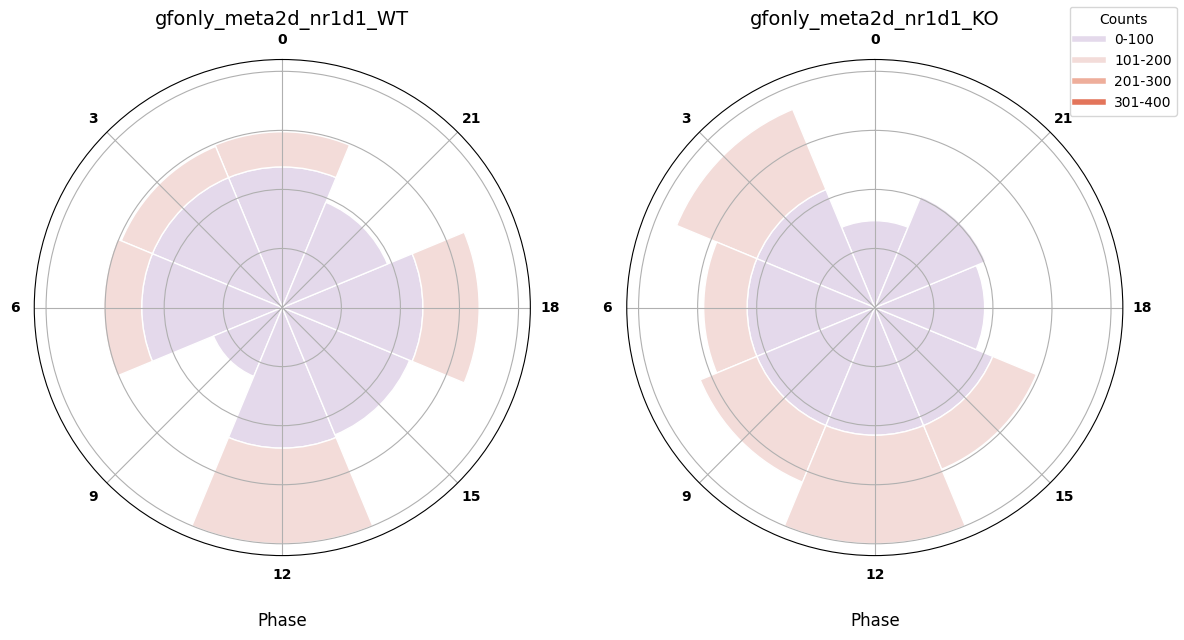

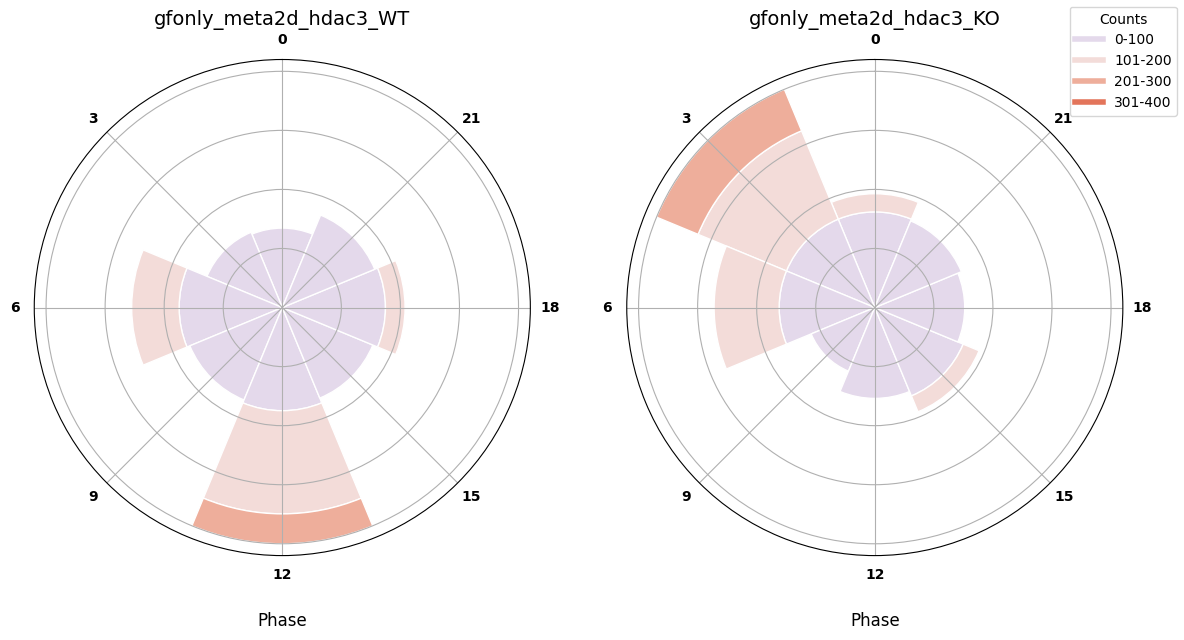

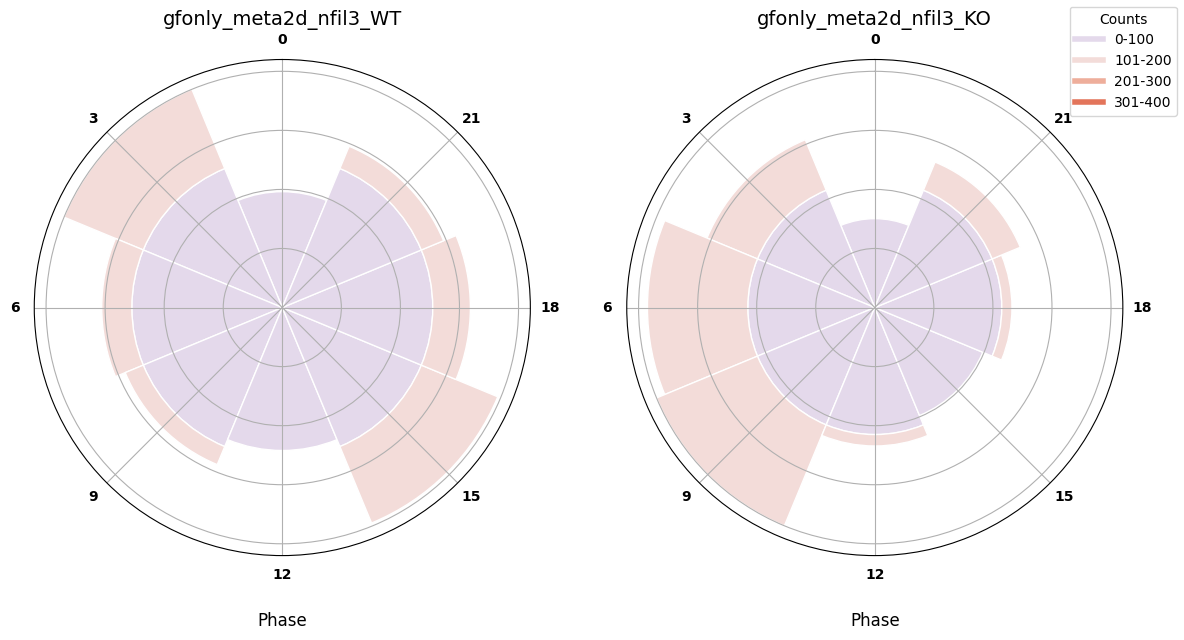

In [89]:
# Define the function to process files and draw the polar plots
def plot_grouped_phases(file_list, cmap):
    num_files = len(file_list)
    fig, axs = plt.subplots(1, num_files, figsize=(6 * num_files, 6), subplot_kw={'projection': 'polar'})

    # If there's only one subplot, axs isn't iterable, so we make it a list
    if num_files == 1:
        axs = [axs]

    for ax, file_name in zip(axs, file_list):
        # Load the data
        df = pd.read_csv(file_name, sep='\t')

        # Process the phase column, rounding to nearest multiple of 3
        df['Rounded_Phase'] = (df['meta2d_phase'] / 3).round() * 3
        phase_counts = df['Rounded_Phase'].value_counts().sort_index()

        # Define the sectors and their corresponding angles
        sectors = np.linspace(0, 2 * np.pi, 8, endpoint=False)
        widths = np.pi / 4 * np.ones_like(sectors)
        ax.set_theta_offset(np.pi / 2)
        # Define count ranges and their corresponding colors
        ranges = [0, 100, 200, 300, 400]
        colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]

        # Plot the bars with color gradient according to specified ranges
        for sector, (lag, count) in zip(sectors, phase_counts.items()):
            bottom = 0
            for i in range(len(ranges) - 1):
                if count > ranges[i]:
                    top = min(count, ranges[i + 1])
                    ax.bar(sector, top - bottom, width=widths[0], bottom=bottom,
                           color=colors[i], edgecolor='white')
                    bottom = top

        # Set the phase labels
        ax.set_xticks(sectors)
        ax.set_xticklabels(range(0, 24, 3), fontsize=10, fontweight='bold')

        # Set the grid and other aesthetics
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)

        # Set the circle grid to be more even
        max_count = phase_counts.max()
        radii_interval = max_count / 4
        radii_ticks = np.arange(0, max_count + radii_interval, radii_interval)
        ax.set_yticks(radii_ticks)
        ax.set_yticklabels([])

        # Remove existing count labels and other annotations
        for text in ax.texts:
            text.set_visible(False)

        # Labeling the axes for phase and count
        ax.text(0.5, -0.15, "Phase", transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', horizontalalignment='center')

        # Add a title for each subplot with the filename (without the extension)
        title = file_name.split('/')[-1].split('.')[0]
        ax.set_title(title, fontsize=14)

    # Create a single legend for all plots
    legend_labels = ["0-100", "101-200", "201-300", "301-400"]
    legend_colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75)]
    patches = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
    fig.legend(patches, legend_labels, loc='upper right', fontsize=10, title="Counts")

    plt.tight_layout()
    plt.show()


file_list_WT = [ 'gfonly_meta2d_nr1d1_WT.txt', 'gfonly_meta2d_hdac3_WT.txt' ,'gfonly_meta2d_nfil3_WT.txt' ,'gfonly_meta2d_GF.txt']
file_list_KO = [ 'gfonly_meta2d_nr1d1_KO.txt', 'gfonly_meta2d_hdac3_KO.txt' ,'gfonly_meta2d_nfil3_KO.txt' ,'gfonly_meta2d_GF.txt']
file_nr1d1 = ["gfonly_meta2d_nr1d1_WT.txt","gfonly_meta2d_nr1d1_KO.txt"]
file_hdac3 = ["gfonly_meta2d_hdac3_WT.txt","gfonly_meta2d_hdac3_KO.txt"]
file_nfil3 = ["gfonly_meta2d_nfil3_WT.txt","gfonly_meta2d_nfil3_KO.txt"]
# Plot the grouped phases
plot_grouped_phases(file_list_WT, custom_cmap)
plot_grouped_phases(file_list_KO, custom_cmap)
plot_grouped_phases(file_nr1d1, custom_cmap)
plot_grouped_phases(file_hdac3, custom_cmap)
plot_grouped_phases(file_nfil3, custom_cmap)

In [ ]:
### shared


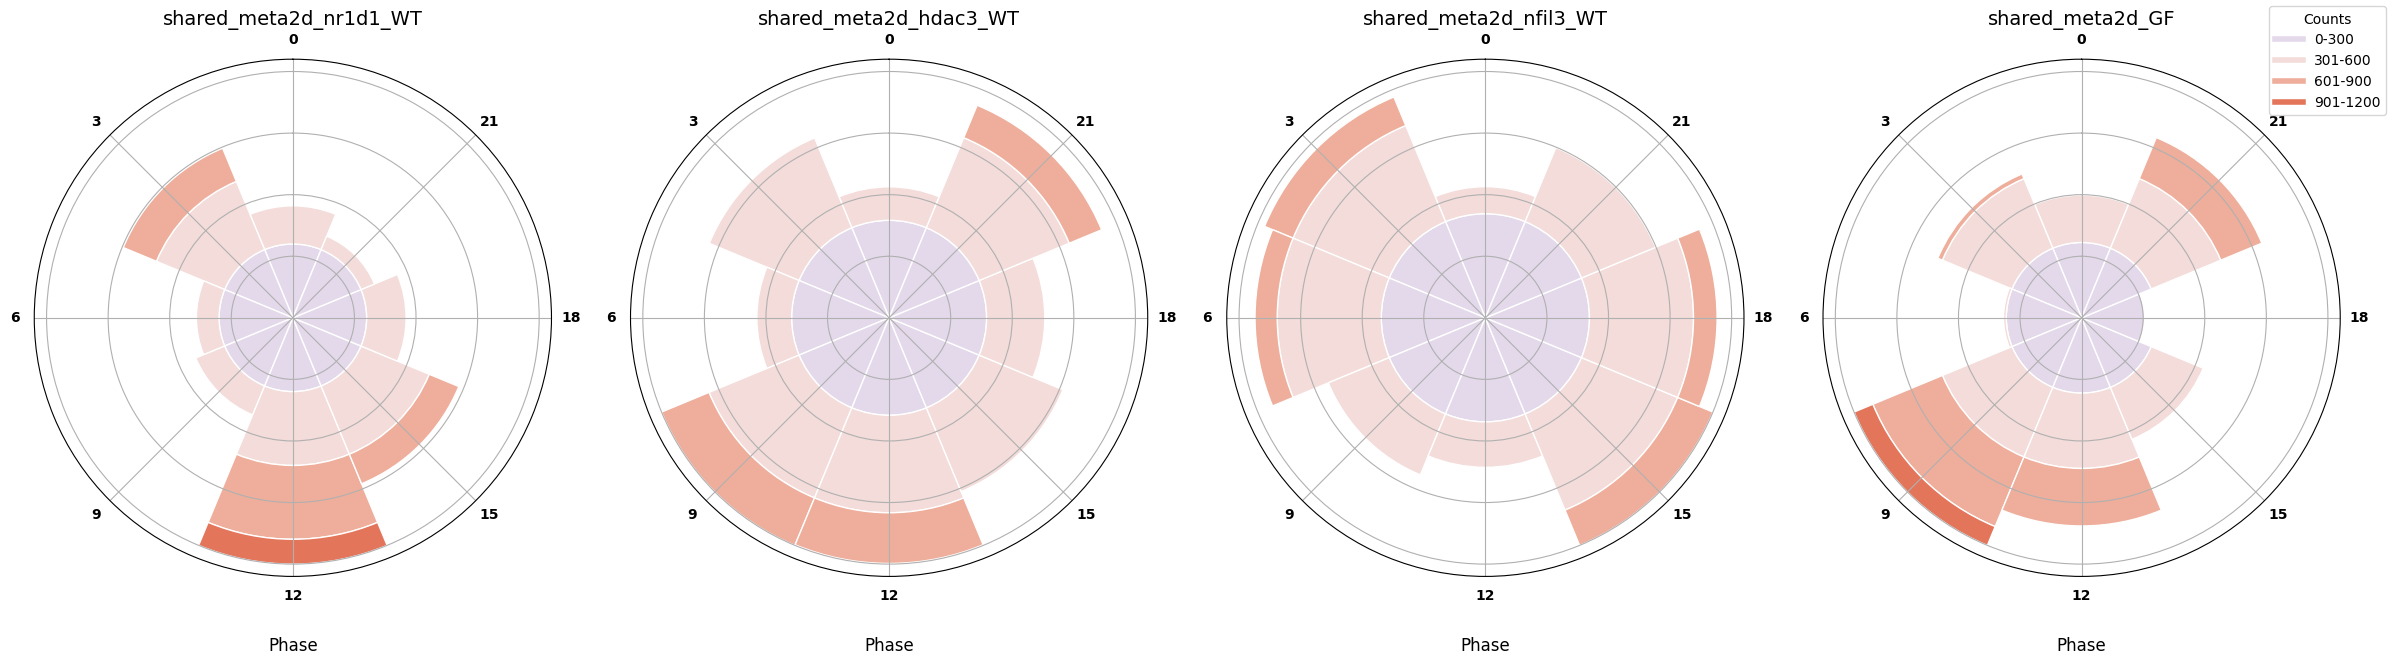

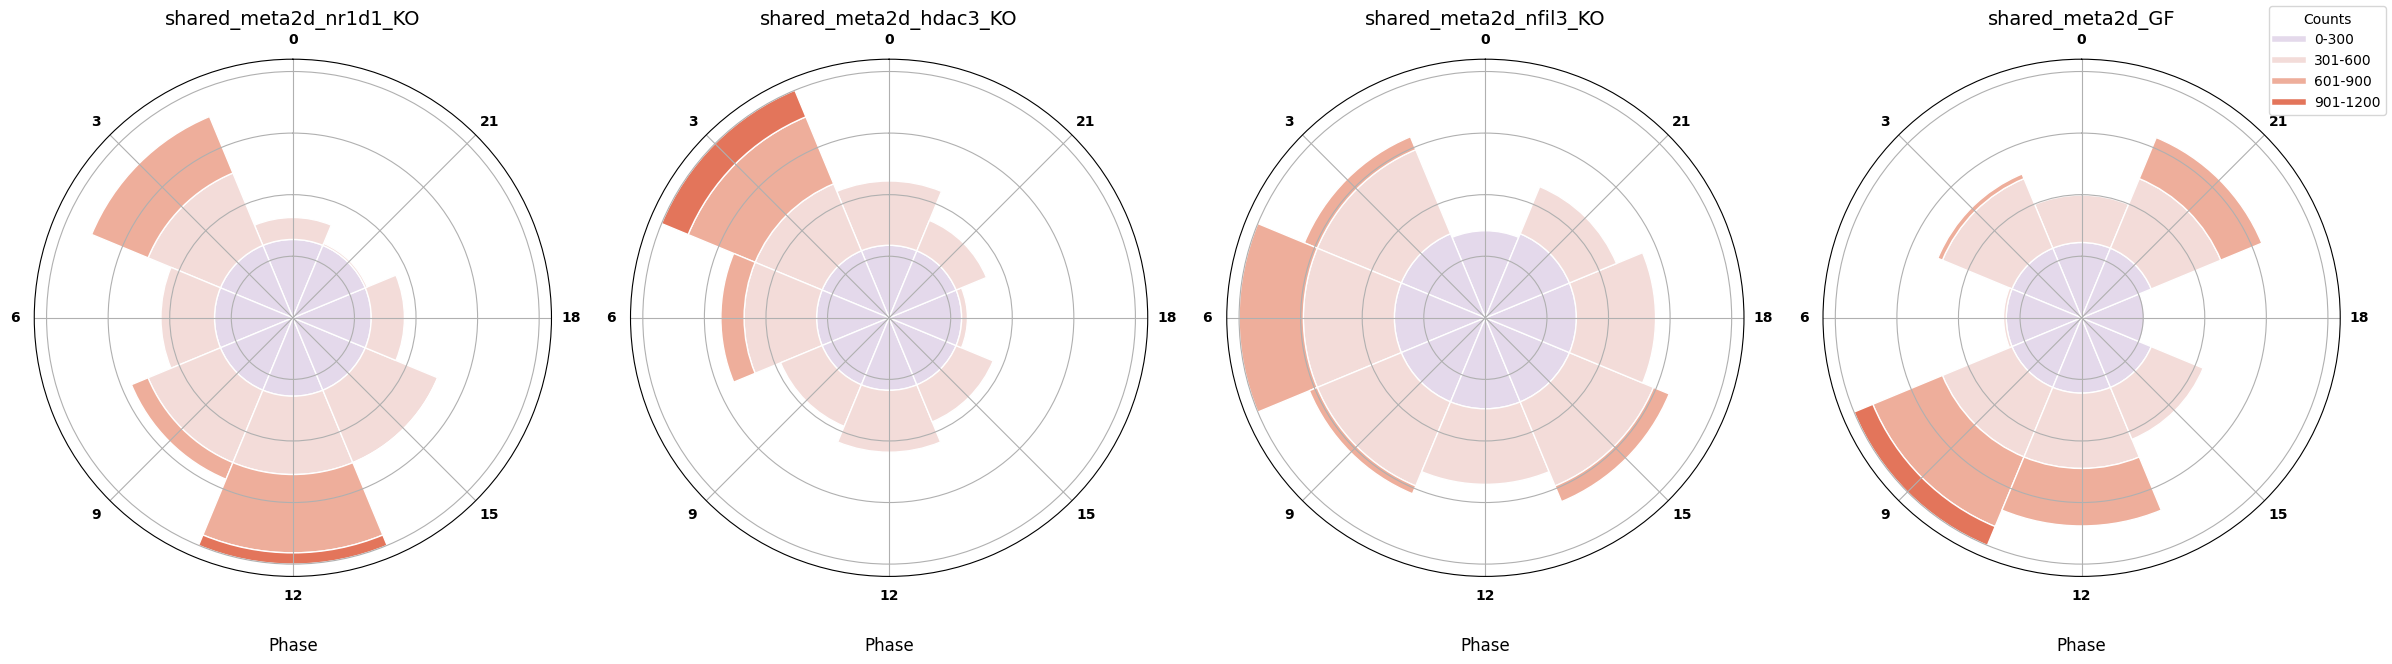

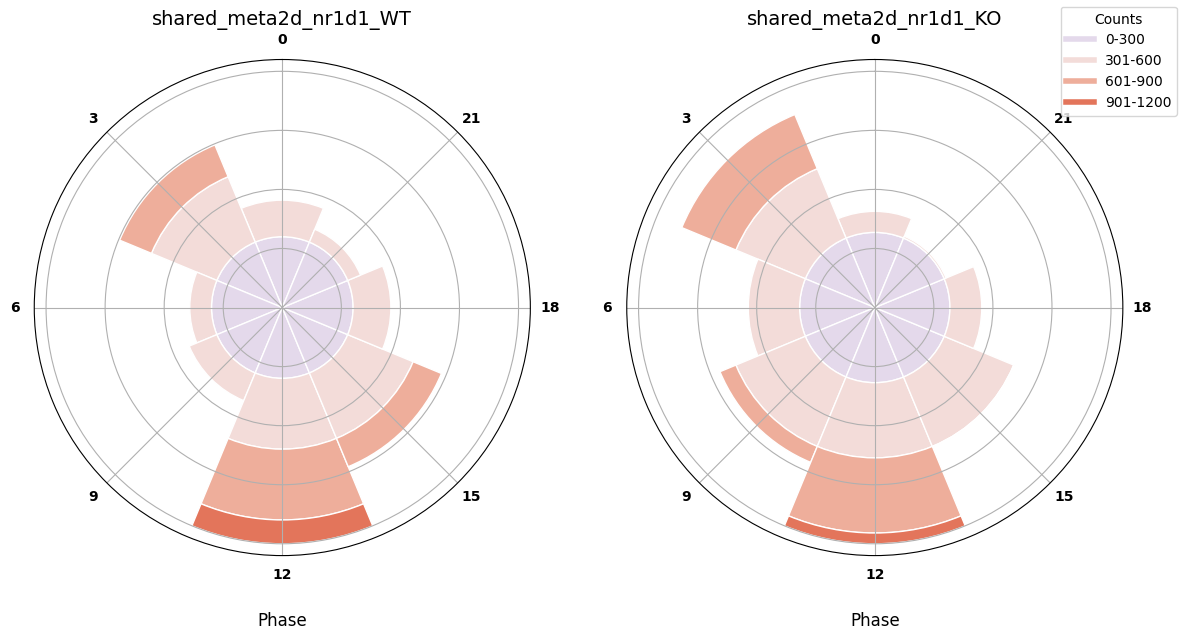

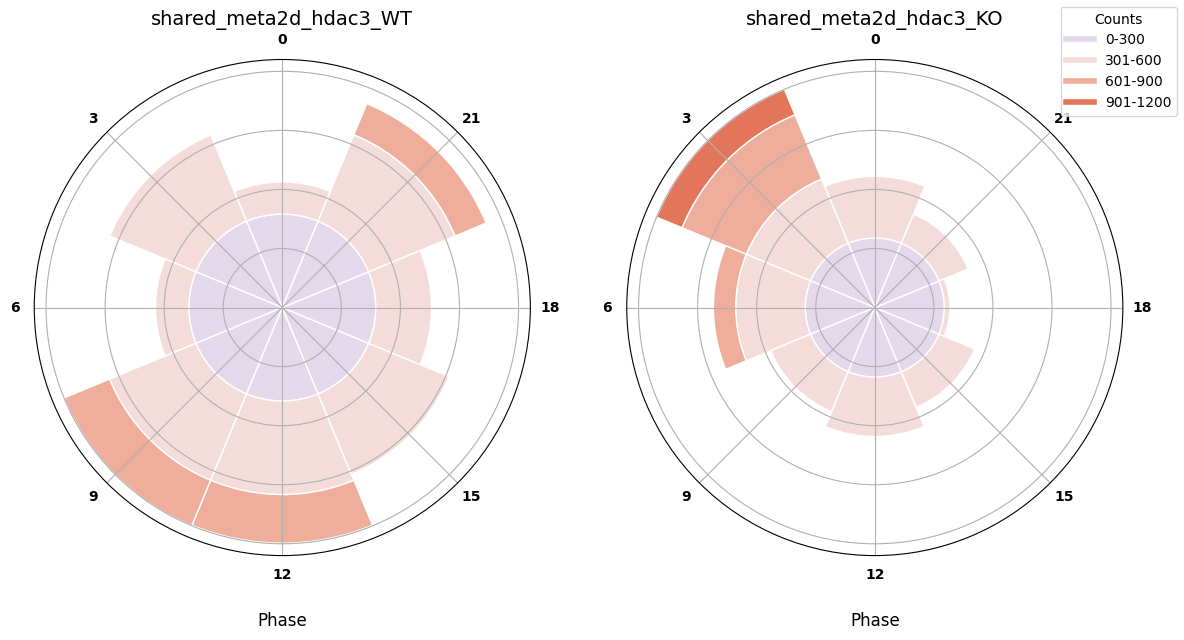

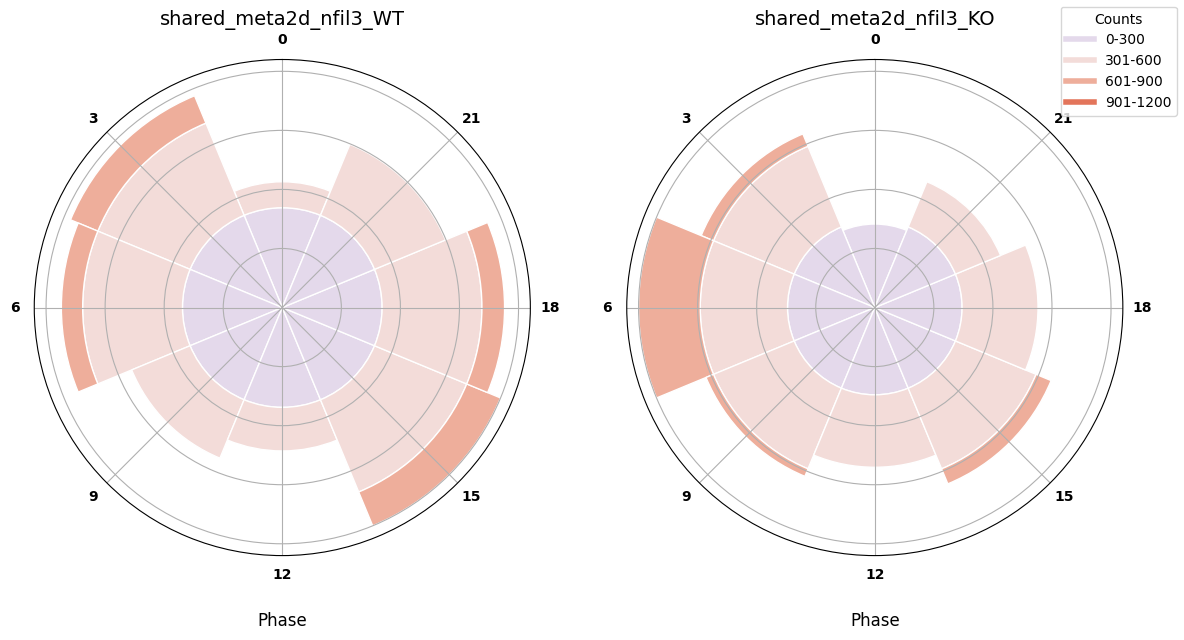

In [90]:
# Define the function to process files and draw the polar plots
def plot_grouped_phases(file_list, cmap):
    num_files = len(file_list)
    fig, axs = plt.subplots(1, num_files, figsize=(6 * num_files, 6), subplot_kw={'projection': 'polar'})

    # If there's only one subplot, axs isn't iterable, so we make it a list
    if num_files == 1:
        axs = [axs]

    for ax, file_name in zip(axs, file_list):
        # Load the data
        df = pd.read_csv(file_name, sep='\t')

        # Process the phase column, rounding to nearest multiple of 3
        df['Rounded_Phase'] = (df['meta2d_phase'] / 3).round() * 3
        phase_counts = df['Rounded_Phase'].value_counts().sort_index()

        # Define the sectors and their corresponding angles
        sectors = np.linspace(0, 2 * np.pi, 8, endpoint=False)
        widths = np.pi / 4 * np.ones_like(sectors)
        ax.set_theta_offset(np.pi / 2)

        # Define count ranges and their corresponding colors
        ranges = [0, 300, 600, 900, 1200]
        colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]

        # Plot the bars with color gradient according to specified ranges
        for sector, (lag, count) in zip(sectors, phase_counts.items()):
            bottom = 0
            for i in range(len(ranges) - 1):
                if count > ranges[i]:
                    top = min(count, ranges[i + 1])
                    ax.bar(sector, top - bottom, width=widths[0], bottom=bottom,
                           color=colors[i], edgecolor='white')
                    bottom = top

        # Set the phase labels
        ax.set_xticks(sectors)
        ax.set_xticklabels(range(0, 24, 3), fontsize=10, fontweight='bold')

        # Set the grid and other aesthetics
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)

        # Set the circle grid to be more even
        max_count = phase_counts.max()
        radii_interval = max_count / 4
        radii_ticks = np.arange(0, max_count + radii_interval, radii_interval)
        ax.set_yticks(radii_ticks)
        ax.set_yticklabels([])

        # Remove existing count labels and other annotations
        for text in ax.texts:
            text.set_visible(False)

        # Labeling the axes for phase and count
        ax.text(0.5, -0.15, "Phase", transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', horizontalalignment='center')

        # Add a title for each subplot with the filename (without the extension)
        title = file_name.split('/')[-1].split('.')[0]
        ax.set_title(title, fontsize=14)

    # Create a single legend for all plots
    legend_labels = ["0-300", "301-600", "601-900", "901-1200"]
    legend_colors = [cmap(0), cmap(0.25), cmap(0.5), cmap(0.75)]
    patches = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
    fig.legend(patches, legend_labels, loc='upper right', fontsize=10, title="Counts")

    plt.tight_layout()
    plt.show()


file_list_WT = [ 'shared_meta2d_nr1d1_WT.txt', 'shared_meta2d_hdac3_WT.txt' ,'shared_meta2d_nfil3_WT.txt' ,'shared_meta2d_GF.txt']
file_list_KO = [ 'shared_meta2d_nr1d1_KO.txt', 'shared_meta2d_hdac3_KO.txt' ,'shared_meta2d_nfil3_KO.txt' ,'shared_meta2d_GF.txt']
file_nr1d1 = ["shared_meta2d_nr1d1_WT.txt","shared_meta2d_nr1d1_KO.txt"]
file_hdac3 = ["shared_meta2d_hdac3_WT.txt","shared_meta2d_hdac3_KO.txt"]
file_nfil3 = ["shared_meta2d_nfil3_WT.txt","shared_meta2d_nfil3_KO.txt"]
# Plot the grouped phases
plot_grouped_phases(file_list_WT, custom_cmap)
plot_grouped_phases(file_list_KO, custom_cmap)
plot_grouped_phases(file_nr1d1, custom_cmap)
plot_grouped_phases(file_hdac3, custom_cmap)
plot_grouped_phases(file_nfil3, custom_cmap)